In [1]:
# my_data.csv 파일 불러오기
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False

df1 = pd.read_csv('my_data_3.csv')

In [2]:
# step이 100부터 350까지인 데이터만 추출하기
df1 = df1[(df1['step'] >= 100) & (df1['step'] <= 350)]
df1 = df1[~df1['lane_id'].str.startswith('c')]

In [3]:
# Grouping by lane_id and calculating the mean of queueing_length and queueing_time
df1 = df1.groupby('lane_id')[['queueing_length', 'queueing_time']].mean().reset_index()

print(df1)

  lane_id  queueing_length  queueing_time
0      1c        53.410590      49.270550
1      2c       234.586484      59.414113
2      3c       265.822490      51.791168
3      4c       297.490926      55.403931


In [4]:
# my_data.csv 파일 불러오기

df2 = pd.read_csv('my_data_4.csv')

In [5]:
# step이 100부터 350까지인 데이터만 추출하기
df2 = df2[(df2['step'] >= 100) & (df2['step'] <= 350)]
df2 = df2[~df2['lane_id'].str.startswith('c')]

# df2에서 lane_id가 ":c"로 시작하는 행 제거
df2 = df2[~df2['lane_id'].str.startswith(':c')]

In [6]:
# Grouping by lane_id and calculating the mean of queueing_length and queueing_time
df2 = df2.groupby('lane_id')[['queueing_length', 'queueing_time']].mean().reset_index()

print(df2)

# 전처리 : lane_id 가 c로 시작하는 행 제거


  lane_id  queueing_length  queueing_time
0      1c        38.665753      34.774239
1      2c       177.971937      41.814925
2      3c       243.672317      50.514191
3      4c       288.717721      50.715138


In [7]:
# df1과 df2의 lane_id 열의 [1c, 2c, 3c, 4c]를 각각 [부도로(강남세브란스병원방면), 부도로(봉은사로방면), 주도로(선릉역방면), 주도로(역삼역방면)] 으로 변경
df1['lane_id'] = df1['lane_id'].replace({'1c':'부도로(강남세브란스병원방면)', '2c':'부도로(봉은사로방면)', '3c':'주도로(선릉역방면)', '4c':'주도로(역삼역방면)'})
df2['lane_id'] = df2['lane_id'].replace({'1c':'부도로(강남세브란스병원방면)', '2c':'부도로(봉은사로방면)', '3c':'주도로(선릉역방면)', '4c':'주도로(역삼역방면)'})
df1


,lane_id,queueing_length,queueing_time
0,부도로(강남세브란스병원방면),53.410590,49.270550
1,부도로(봉은사로방면),234.586484,59.414113
2,주도로(선릉역방면),265.822490,51.791168
3,주도로(역삼역방면),297.490926,55.403931


In [8]:
df2

,lane_id,queueing_length,queueing_time
0,부도로(강남세브란스병원방면),38.665753,34.774239
1,부도로(봉은사로방면),177.971937,41.814925
2,주도로(선릉역방면),243.672317,50.514191
3,주도로(역삼역방면),288.717721,50.715138


In [9]:
# df1과 df2의 0,1번 index를 가장 밑으로 보내기
df1 = df1._append(df1.loc[[0,1]], ignore_index=True)
df1 = df1.drop([0,1])
df2 = df2._append(df2.loc[[0,1]], ignore_index=True)
df2 = df2.drop([0,1])

print(df1)
print(df2)

           lane_id  queueing_length  queueing_time
2       주도로(선릉역방면)       265.822490      51.791168
3       주도로(역삼역방면)       297.490926      55.403931
4  부도로(강남세브란스병원방면)        53.410590      49.270550
5      부도로(봉은사로방면)       234.586484      59.414113
           lane_id  queueing_length  queueing_time
2       주도로(선릉역방면)       243.672317      50.514191
3       주도로(역삼역방면)       288.717721      50.715138
4  부도로(강남세브란스병원방면)        38.665753      34.774239
5      부도로(봉은사로방면)       177.971937      41.814925


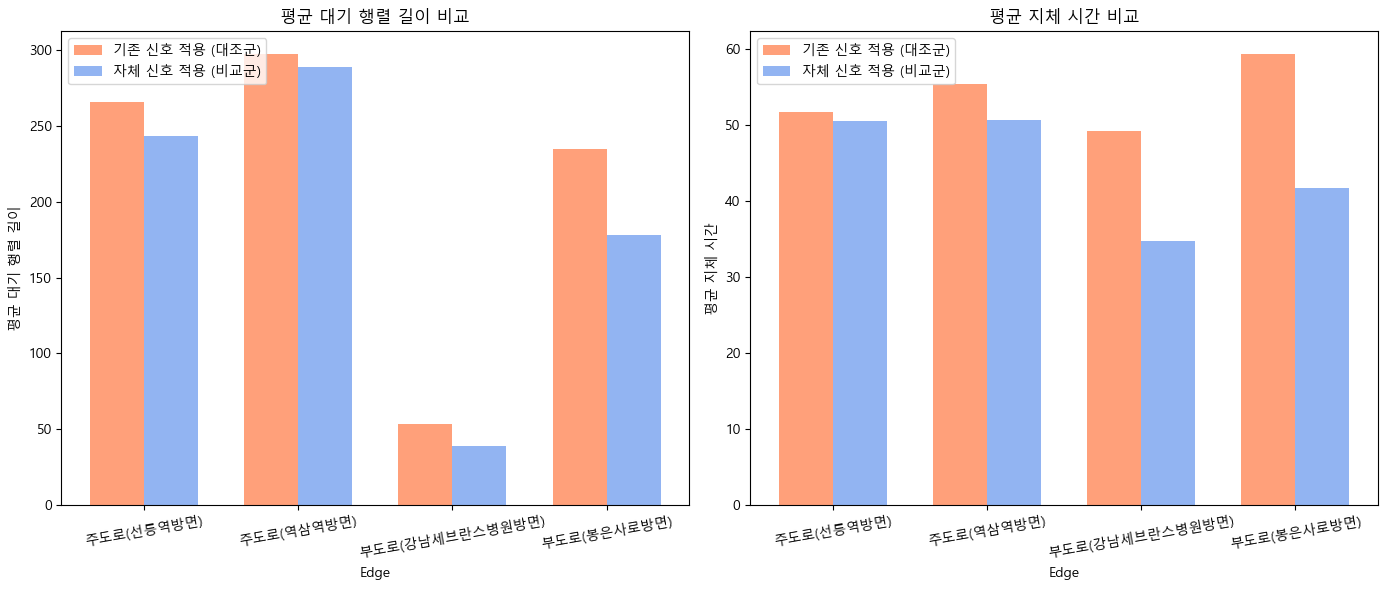

In [10]:
# Plotting queueing_length and queueing_time on separate bar charts

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plotting queueing_length
bar_width = 0.35  # the width of the bars
index = df1['lane_id']

r1 = range(len(index))
r2 = [x + bar_width for x in r1]

ax1.bar(r1, df1['queueing_length'], bar_width, label='기존 신호 적용 (대조군)', color='lightsalmon')
ax1.bar(r2, df2['queueing_length'], bar_width, label='자체 신호 적용 (비교군)', alpha=0.7, color='cornflowerblue')

ax1.set_xlabel('Edge')
ax1.set_ylabel('평균 대기 행렬 길이')
ax1.set_title('평균 대기 행렬 길이 비교')
ax1.set_xticks([r + bar_width / 2 for r in range(len(index))])
ax1.set_xticklabels(index, rotation=10)
ax1.legend(loc='upper left')

# Plotting queueing_time
ax2.bar(r1, df1['queueing_time'], bar_width, label='기존 신호 적용 (대조군)', color='lightsalmon')
ax2.bar(r2, df2['queueing_time'], bar_width, label='자체 신호 적용 (비교군)', alpha=0.7, color='cornflowerblue')

ax2.set_xlabel('Edge')
ax2.set_ylabel('평균 지체 시간')
ax2.set_title('평균 지체 시간 비교')
ax2.set_xticks([r + bar_width / 2 for r in range(len(index))])
ax2.set_xticklabels(index, rotation=10)
# legend 왼쪽으로 고정
ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()


In [11]:
# temp_step_1.csv 파일 불러오기
df3 = pd.read_csv('temp_step_1_1.csv')

In [12]:
# df3의 평균 구하기
df3 = df3.mean().reset_index()

In [13]:
df3

,index,0
0,step,99.905142
